In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
ruta = '..\metadata-sitios\metadata_establecimientos'

In [8]:
df = pd.read_csv(ruta)

In [9]:
df=df.drop(columns=['Unnamed: 0'])

# EDA

In [10]:
df.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,3007557.000,3007557.000,3007557.000,3007557.000
mean,37.431,-92.337,4.305,43.853
std,5.425,16.355,0.710,143.376
min,-40.929,-178.807,1.000,1.000
25%,33.711,-99.207,4.000,7.000
50%,38.283,-87.597,4.500,18.000
75%,41.292,-80.293,4.800,44.000
max,87.857,180.000,5.000,9998.000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007557 entries, 0 to 3007556
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   latitude          float64
 4   longitude         float64
 5   category          object 
 6   avg_rating        float64
 7   num_of_reviews    int64  
 8   relative_results  object 
 9   url               object 
dtypes: float64(3), int64(1), object(6)
memory usage: 229.5+ MB


In [24]:
df['address'].duplicated().sum()

108961

In [12]:
df.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388,-83.357,Pharmacy,4.900,16,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.019,-118.215,Textile exporter,4.500,6,"['0x80c2c624136ea88b:0xb0315367ed448771', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058,-118.292,Korean restaurant,4.400,18,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


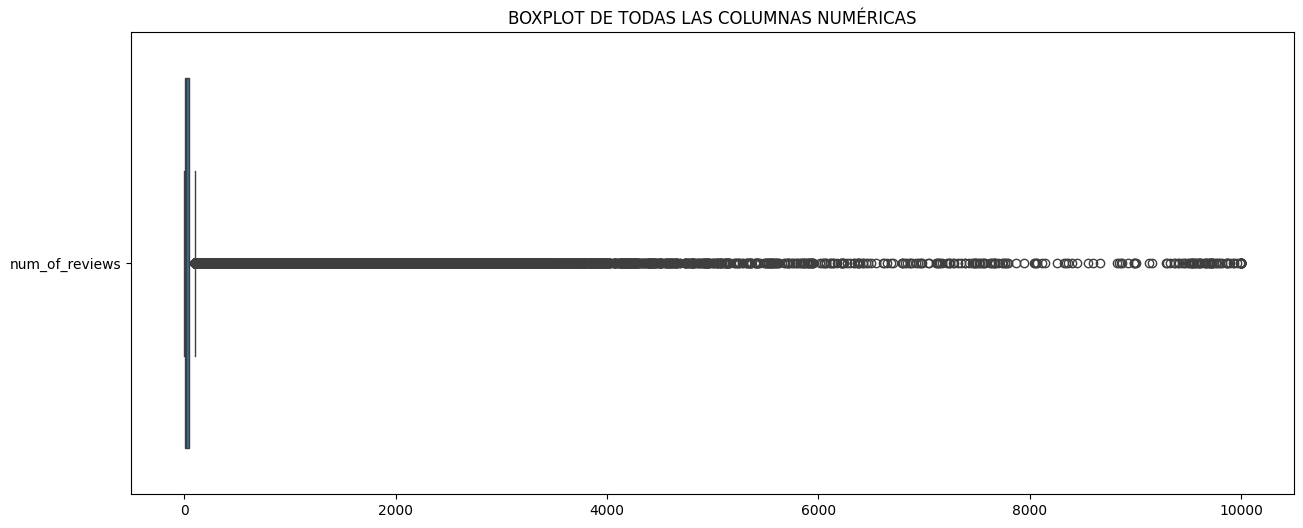

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df.iloc[:, 7:], orient='h')
plt.title('BOXPLOT DE TODAS LAS COLUMNAS NUMÉRICAS') 
plt.show()

Se aprecia que esta columna contiene valores que  son bastante altos por lo que se procedera a realizar un analisis mediante la eliminación de outliers y otro incluyendolos.

# ANALISIS ENTRE VARIABLES NUMERICAS CON OUTLIERS

Se realiza el analisis de datos del numero de reseñas por categoría

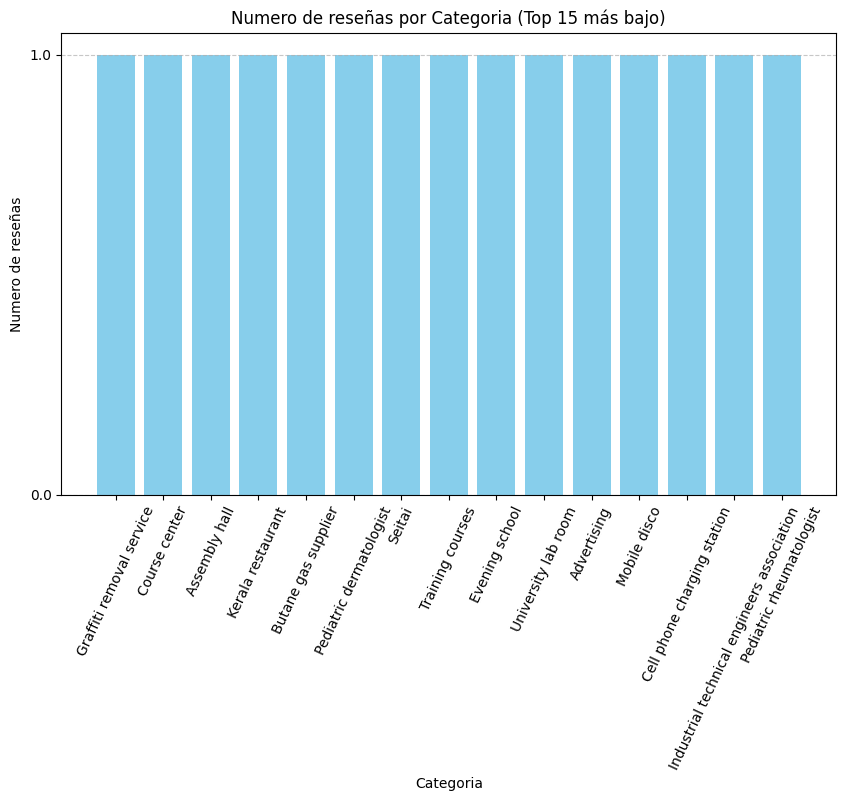

In [14]:
# Agrupar por 'Categoria' y sumar los valores
grouped_data = df.groupby('category')['num_of_reviews'].sum().reset_index()

# Ordenar en orden descendente
sorted_data = grouped_data.sort_values(by='num_of_reviews', ascending=True)

# Seleccionar el top 15
top_n = 15
top_categories = sorted_data.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_categories['category'], top_categories['num_of_reviews'], color='skyblue')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Categoria')
plt.ylabel('Numero de reseñas')
plt.title('Numero de reseñas por Categoria (Top 15 más bajo)')
# Configurar el formato de los ticks en el eje y para evitar notación científica
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
formatter = ticker.StrMethodFormatter('{x:,.1f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

- Se aprecia que el mínimo de reseñas fue de 1 para varias categorías

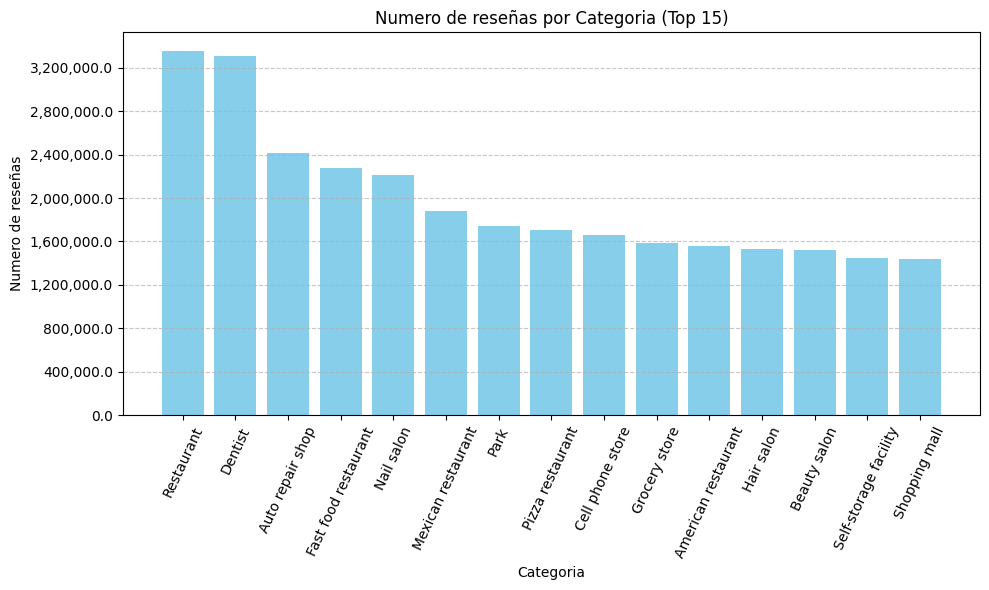

In [15]:
# Agrupar por 'Categoria' y sumar los valores
grouped_data = df.groupby('category')['num_of_reviews'].sum().reset_index()

# Ordenar en orden descendente
sorted_data = grouped_data.sort_values(by='num_of_reviews', ascending=False)

# Seleccionar el top 15
top_n = 15
top_categories = sorted_data.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_categories['category'], top_categories['num_of_reviews'], color='skyblue')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Categoria')
plt.ylabel('Numero de reseñas')
plt.title('Numero de reseñas por Categoria (Top 15)')

# Configurar el formato de los ticks en el eje y para evitar notación científica
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
formatter = ticker.StrMethodFormatter('{x:,.1f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- En este caso se puede apreciar que los que presentan mayor cantidad de reseñas son principalmente los restaurantes y seguido por los dentistas.

A continuacion se realiza los histogramas para el top 15 y el top 15 más bajo

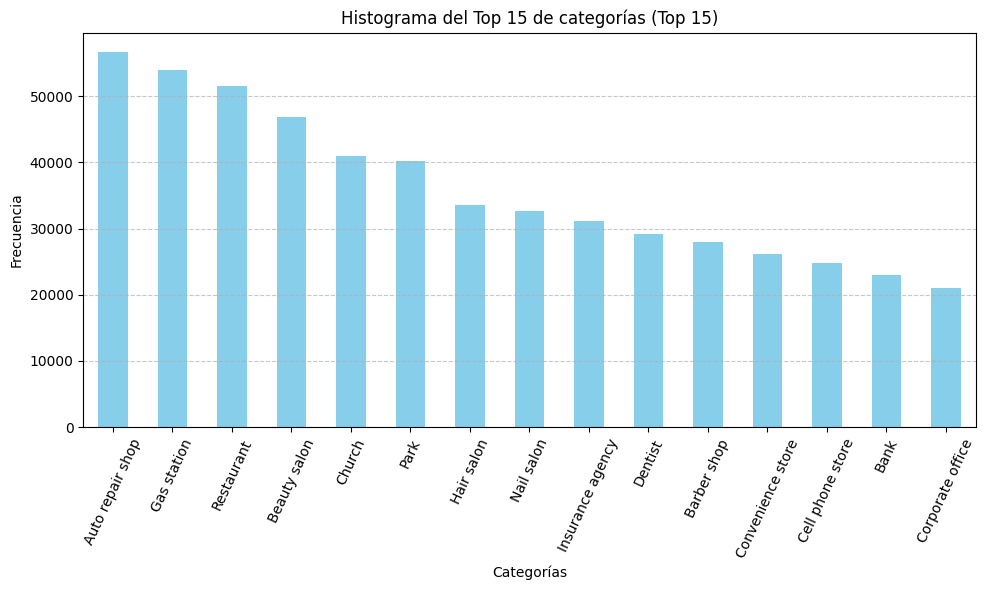

In [16]:
# Obtener el top 10 de la columna
top_15 = df['category'].value_counts().nlargest(15)

# ORDEN DESCENDENTE
top_15 = top_15.sort_values(ascending=False)

# Crear el histograma
plt.figure(figsize=(10, 6))
top_15.plot(kind='bar', color='skyblue')
plt.title('Histograma del Top 15 de categorías (Top 15)')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Aquí se aprecia la frecuencia de locales que hay por categoría donde la mayor es de tienda reparación de autos

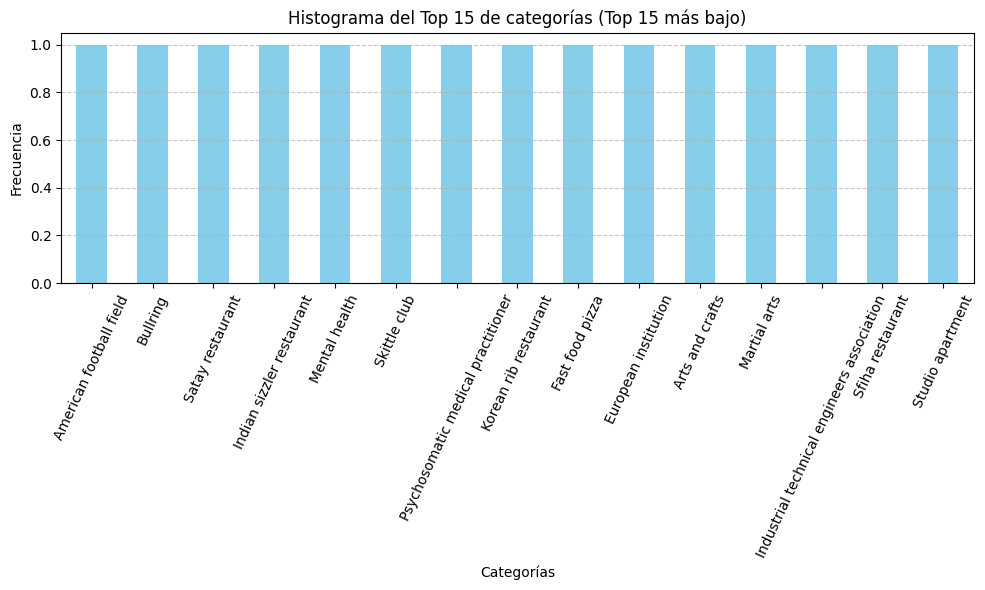

In [17]:
# Obtener el top 10 de la columna
top_15 = df['category'].value_counts().nsmallest(15)

# ORDEN DESCENDENTE
top_15 = top_15.sort_values(ascending=True)

# Crear el histograma
plt.figure(figsize=(10, 6))
top_15.plot(kind='bar', color='skyblue')
plt.title('Histograma del Top 15 de categorías (Top 15 más bajo)')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Todas las categorías representadas tienen una frecuencia igual a 1, indicando que cada una aparece solo una vez en el conjunto de datos.

a continuación se tiene el Análisis de datos para el numero de reseñas por empresa

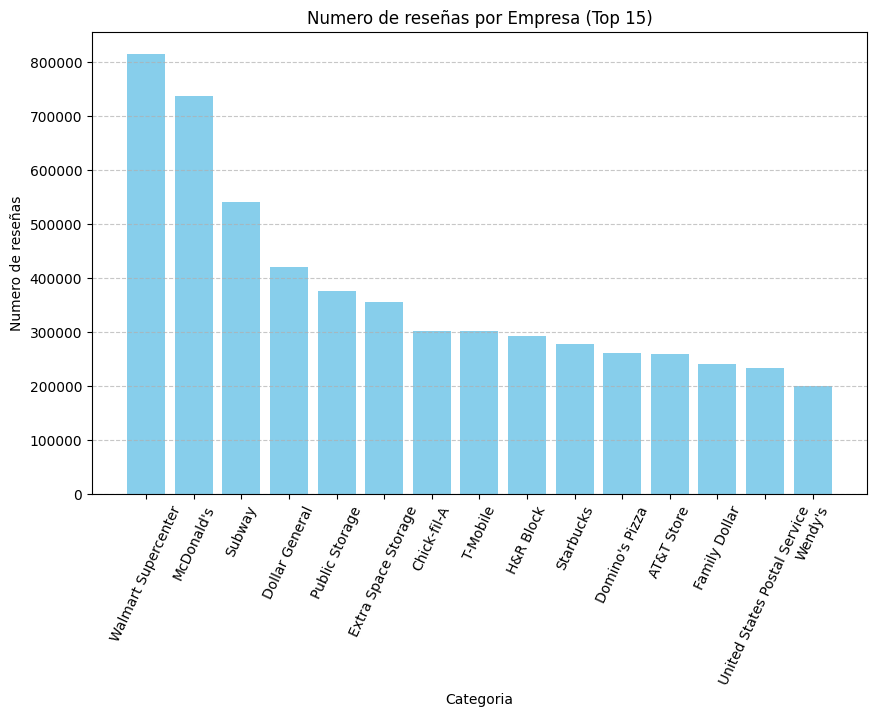

In [18]:
# Agrupar por 'Categoria' y sumar los valores
grouped_data = df.groupby('name')['num_of_reviews'].sum().reset_index()

# Ordenar en orden descendente
sorted_data = grouped_data.sort_values(by='num_of_reviews', ascending=False)

# Seleccionar el top 15
top_n = 15
top_categories = sorted_data.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_categories['name'], top_categories['num_of_reviews'], color='skyblue')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Categoria')
plt.ylabel('Numero de reseñas')
plt.title('Numero de reseñas por Empresa (Top 15)')
plt.show()

- El gráfico muestra que Walmart es la empresa con más reseñas, seguida de cerca por otras grandes cadenas de comida rápida y retail. Esto sugiere que los clientes de estos tipos de negocios son más propensos a dejar opiniones en línea.

- A partir del quinto lugar, la cantidad de reseñas disminuye significativamente. Esto indica que no todas las empresas reciben la misma cantidad de opiniones de sus clientes.

Text(0.5, 1.0, 'Numero de reseñas por Empresa (Top 15 más bajo)')

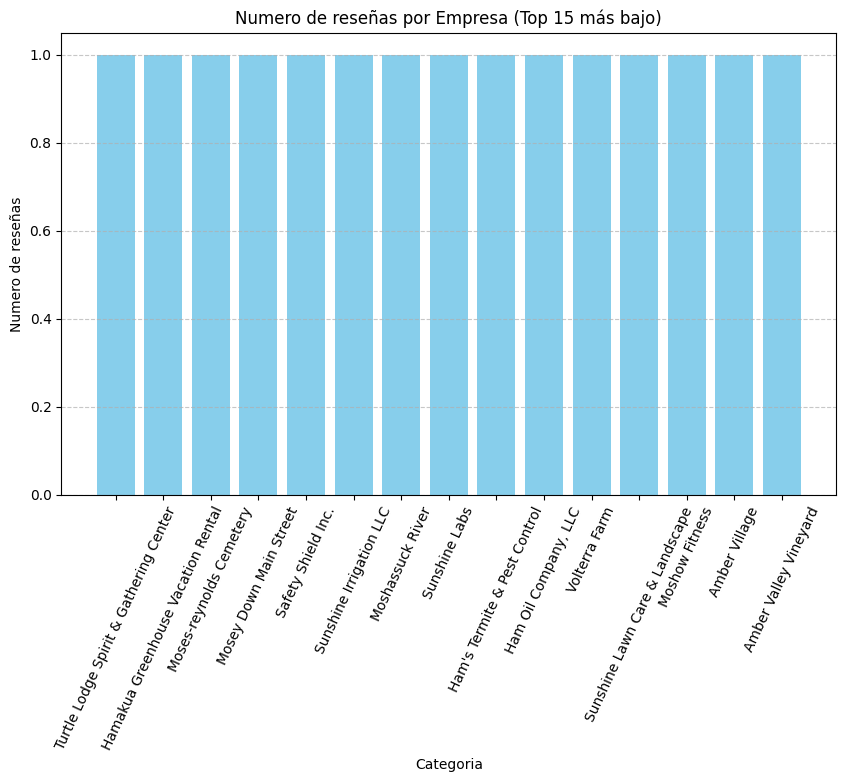

In [19]:
# Agrupar por 'Categoria' y sumar los valores
grouped_data = df.groupby('name')['num_of_reviews'].sum().reset_index()

# Ordenar en orden descendente
sorted_data = grouped_data.sort_values(by='num_of_reviews', ascending=True)

# Seleccionar el top 15
top_n = 15
top_categories = sorted_data.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_categories['name'], top_categories['num_of_reviews'], color='skyblue')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Categoria')
plt.ylabel('Numero de reseñas')
plt.title('Numero de reseñas por Empresa (Top 15 más bajo)')

en este grafico solamente se puede apreciar que existe solo un dato para estas categorías

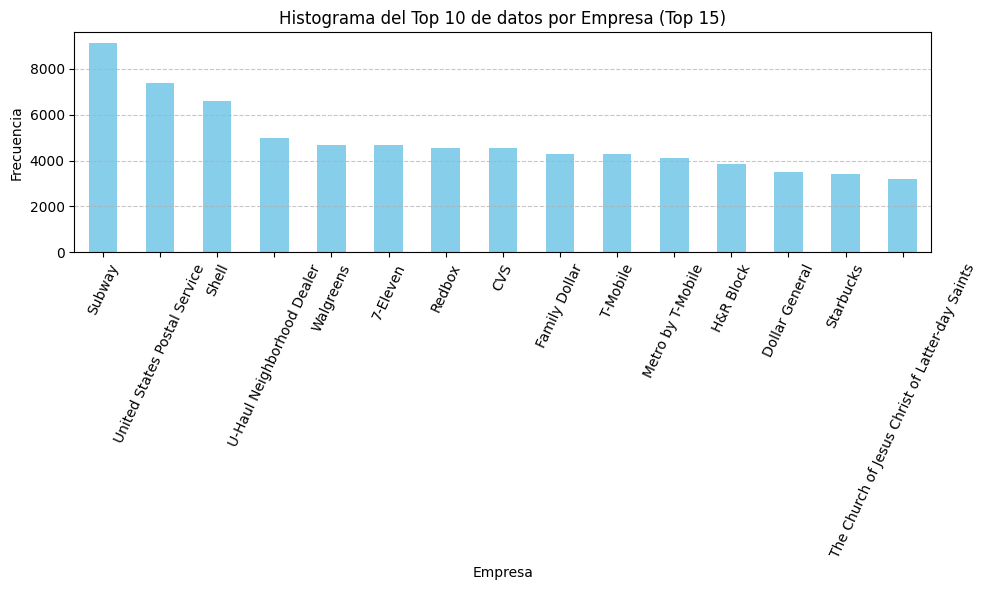

In [20]:
# Obtener el top 10 de la columna
top_15 = df['name'].value_counts().nlargest(15)

# Crear el histograma
plt.figure(figsize=(10, 6))
top_15.plot(kind='bar', color='skyblue')
plt.title('Histograma del Top 10 de datos por Empresa (Top 15)')
plt.xlabel('Empresa')
plt.ylabel('Frecuencia')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Subway lidera en menciones: Claramente, Subway es la empresa que más aparece en los datos, seguida de cerca por el Servicio Postal de Estados Unidos.
- Dominancia de grandes cadenas: Las grandes cadenas de comida rápida, retail y servicios (Subway, Walgreens, CVS, etc.) concentran la mayoría de las menciones.
- Caída gradual en menciones: A partir de Subway, se observa una disminución progresiva en la frecuencia de menciones para las demás empresas.

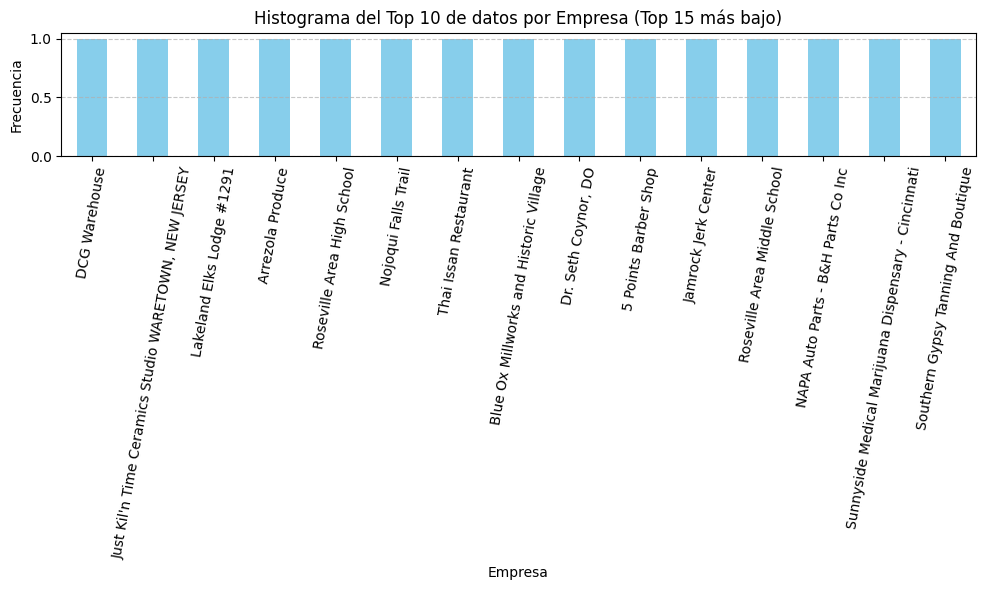

In [21]:
# Paso 1: Obtener el top 10 de la columna
top_10 = df['name'].value_counts().nsmallest(15)

# Paso 2: Crear el histograma
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='skyblue')
plt.title('Histograma del Top 10 de datos por Empresa (Top 15 más bajo)')
plt.xlabel('Empresa')
plt.ylabel('Frecuencia')
plt.xticks(rotation=80)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

en este grafico solamente se puede apreciar que existe solo un dato para estas empresa

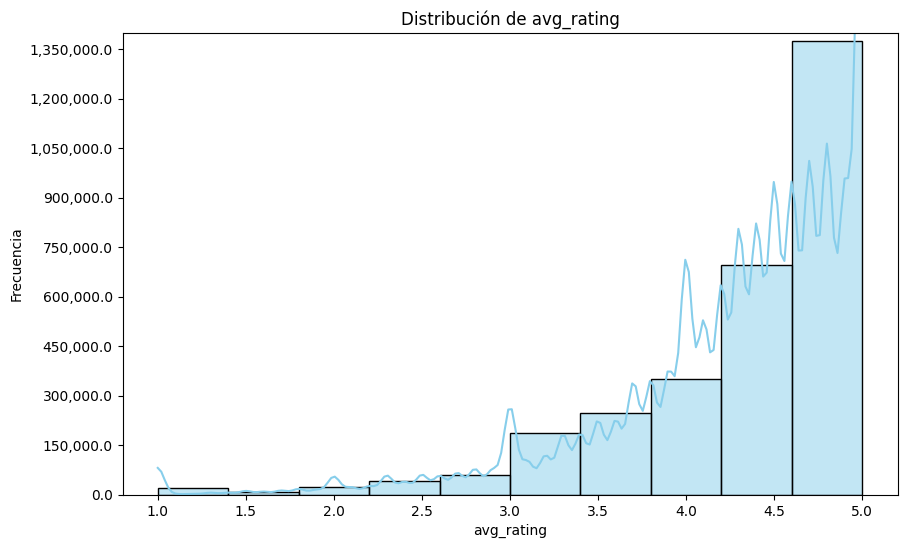

In [22]:
# Filtrar el top 10 basado en la columna 'num_of_reviews'
top_15 = df.sort_values(by='num_of_reviews', ascending=False)

# Crear la visualización
plt.figure(figsize=(10, 6))
sns.histplot(top_15['avg_rating'], bins=10, kde=True, color='skyblue')

plt.ylim(0, 1400000)

plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de avg_rating')

# Configurar el formato de los ticks en el eje y para evitar notación científica
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
formatter = ticker.StrMethodFormatter('{x:,.1f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

- Mayoría de calificaciones altas: La gran mayoría de las calificaciones promedio se concentran entre 4 y 5 estrellas. Esto sugiere que, en general, la evaluación de lo que se está calificando es bastante positiva.

- Distribución asimétrica: La distribución no es simétrica. Hay una larga cola hacia la izquierda, lo que indica que hay una menor cantidad de calificaciones bajas (por debajo de 3 estrellas) en comparación con las altas.

- Picos y valles: La línea azul sobrepuesta al histograma muestra una curva con varios picos y valles. Estos picos podrían indicar valores de calificación promedio muy comunes, mientras que los valles representan valores menos frecuentes.

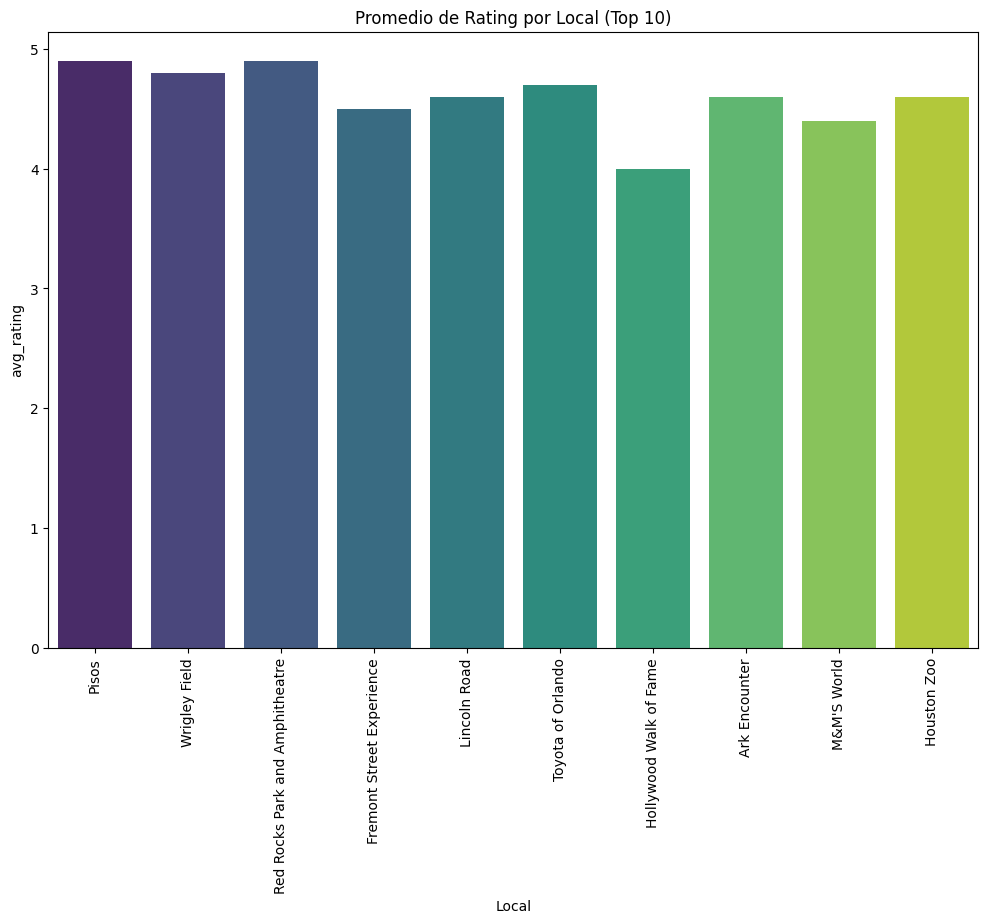

In [33]:
top_10_df=df.nlargest(10, 'num_of_reviews')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_df, x='name', y='avg_rating', hue='name', palette='viridis', legend=False)
plt.xlabel('Local')
plt.ylabel('avg_rating')
plt.title('Promedio de Rating por Local (Top 10)')
plt.xticks(rotation=90)
plt.show()

- Pisos y Wrigley Field lideran: Estos dos lugares son los que tienen el promedio de calificación más alto, lo que sugiere que son muy bien valorados por quienes los visitan.

- Variedad de calificaciones: Si bien la mayoría de los lugares tienen una calificación promedio alta, existe una cierta variabilidad entre ellos. Por ejemplo, Hollywood Walk of Fame tiene una calificación un poco más baja en comparación con los primeros lugares.

- Posibles factores a considerar: Las calificaciones pueden verse influenciadas por diversos factores como la experiencia individual de cada visitante, las expectativas, la época del año, etc.